In [47]:
import csv
import math
import random


## Using Naive Bayes Classification Algorithm

In [65]:
def loadCsv(filename):
    lines = csv.reader(open("pima-indians-diabetes.csv"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i]=[ float(x) for x in dataset[i]]
    return dataset


In [49]:
def splitDataset(dataset,splitRatio):
    trainSize=int(len(dataset)*splitRatio)
    trainSet= []
    copy = list(dataset)
    while len(trainSet)<trainSize:
        index= random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet,copy]


In [50]:
def separateByClass(dataset):
    separated ={}
    for i in range(len(dataset)):
        vector=dataset[i]
        if(vector[-1] not in separated):
            separated[vector[-1]]=[]
        separated[vector[-1]].append(vector)
    return separated

In [51]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))
    

In [52]:
def stdev(numbers):
    avg=mean(numbers)
    variance = sum([ pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)


In [53]:
def summarize(dataset):
    summaries = [(mean(attribute),stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries


In [54]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries


In [55]:
def calculateProbability(x,mean,stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math.pi)*stdev))*exponent


In [67]:
def calculateClassProbabilities(summaries,inputVector):
    probabilities ={}
    for classValue,classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean,stdev = classSummaries[i]
            x=inputVector[i]
            probabilities[classValue]*=calculateProbability(x,mean,stdev)
        return probabilities

In [57]:
def predict(summaries,inputVector):
    probabilities = calculateClassProbabilities(summaries,inputVector)
    bestlLabel,bestProb =None,-1
    for classValue, probability in probabilities.items():
        if bestlLabel is None or probability>bestProb:
            bestProb= probability
            bestlLabel=classValue
    return bestlLabel


In [58]:
def getPredictions(summaries,testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries,testSet[i])
        predictions.append(result)
    return predictions

In [59]:
def getAccuracy(testSet,predictions):
    correct=0
    for x in range(len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
    return (correct/float(len(testSet)))*100.0

In [69]:
def main():
    filename='diabetes.csv'
    splitRatio=0.8
    dataset=loadCsv(filename)
    trainingSet,testSet=splitDataset(dataset,splitRatio)
    print("Split {0} rows into train = {1} and test= {2} rows".format(len(dataset),len(trainingSet),len(testSet)))
    #prepare model
    summaries = summarizeByClass(trainingSet)
    #test Model
    predictions = getPredictions(summaries,testSet)
    accuracy = getAccuracy(testSet,predictions)
    print('Accuracy :{0}%'.format(accuracy))
    
main() 

Split 768 rows into train = 614 and test= 154 rows
Accuracy :68.1818181818%


# Classification using ANN Model 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


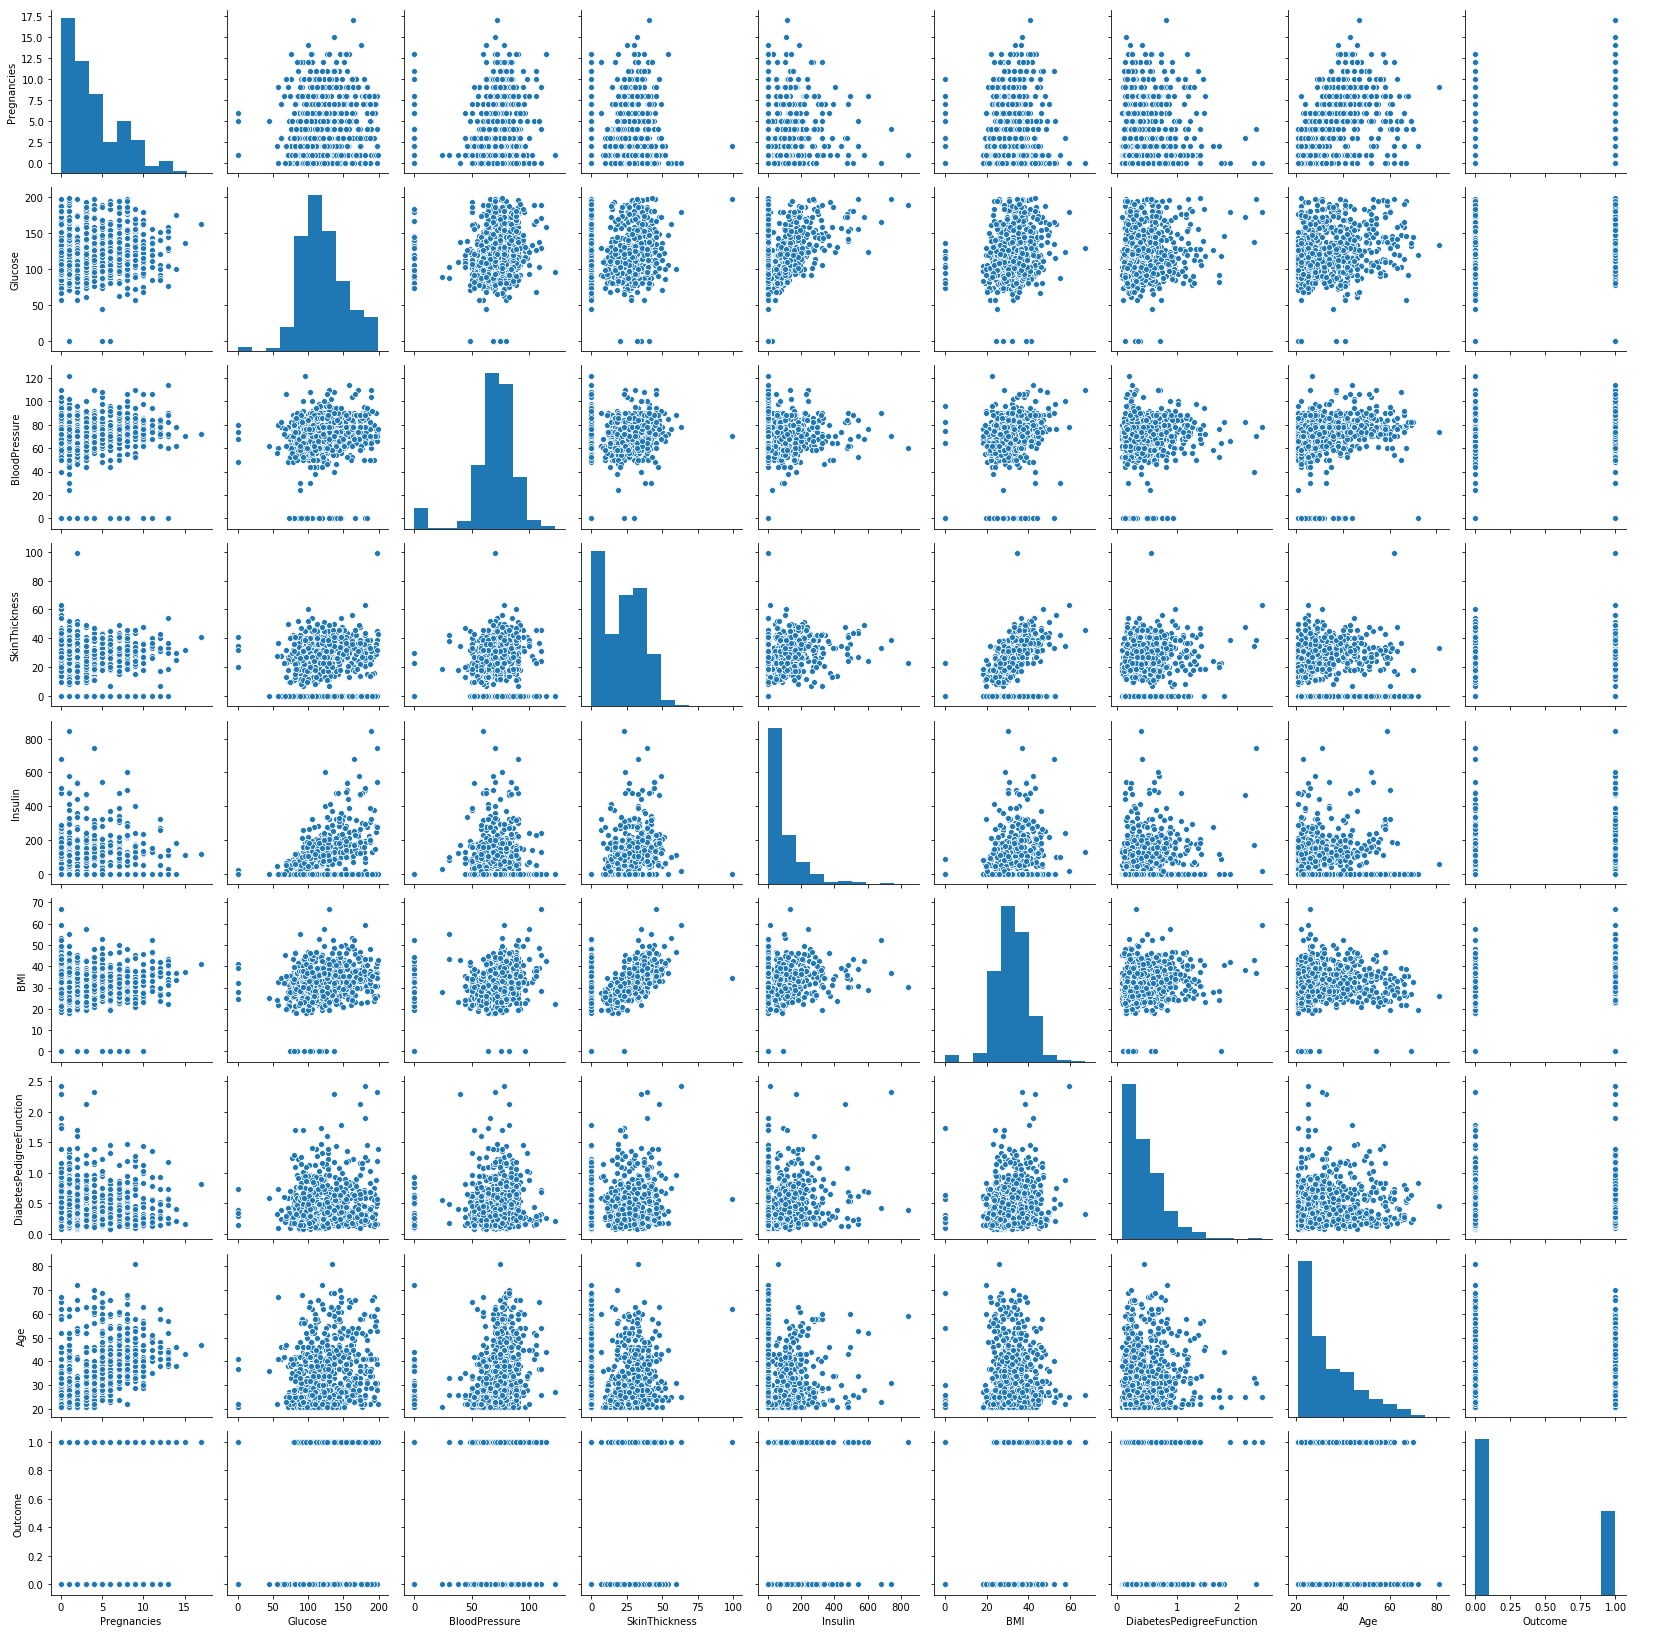

In [6]:
sns.pairplot(df)

In [100]:
cor=df.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


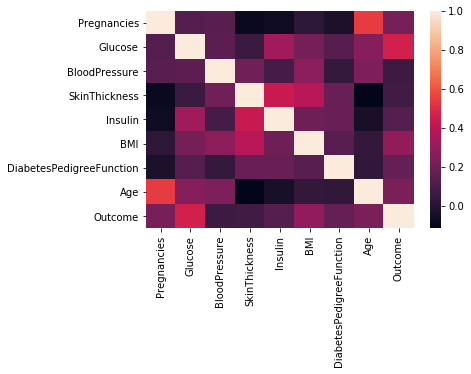

In [101]:
sns.heatmap(cor)

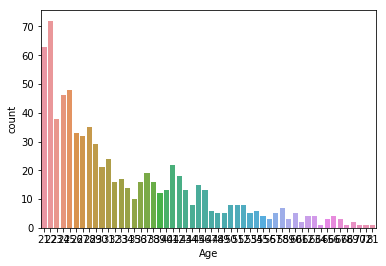

In [9]:
sns.countplot(df["Age"])

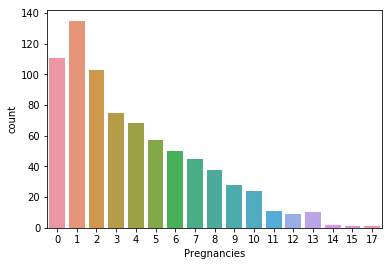

In [10]:
sns.countplot(df["Pregnancies"])

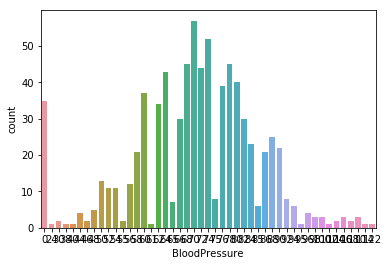

In [94]:
sns.countplot(df["BloodPressure"])

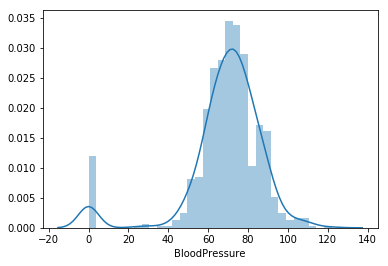

In [96]:
sns.distplot(df["BloodPressure"])

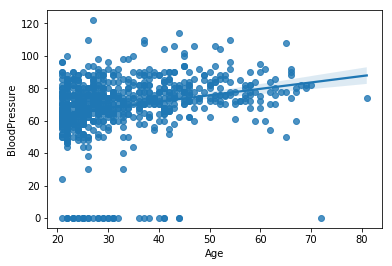

In [98]:
sns.regplot(df["Age"],df["BloodPressure"])

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.shape

(768, 9)

In [13]:
X=df.iloc[:,:8].values
Y=df.iloc[:,8:9].values

In [17]:

#Spliting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [18]:
x_train.shape

(576, 8)

In [20]:
x_test.shape

(192, 8)

In [ ]:
#ANN Model

In [21]:
# importing the libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [29]:
#Initializing the model
model=Sequential()
model.add(Dense(5,kernel_initializer='uniform',activation='relu',input_dim=8))
#Adding 2nd hidden layer
model.add(Dense(5,kernel_initializer='uniform',activation='relu'))
#Adding the 3rd hidden layer
model.add(Dense(5,kernel_initializer='uniform',activation='relu'))
#Adding output layer
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Train on 576 samples, validate on 192 samples
Epoch 1/300
576/576 [==============================] - 0s 404us/sample - loss: 0.5483 - accuracy: 0.7222 - val_loss: 0.6390 - val_accuracy: 0.6771
Epoch 2/300
576/576 [==============================] - 0s 411us/sample - loss: 0.5533 - accuracy: 0.7257 - val_loss: 0.5089 - val_accuracy: 0.7812
Epoch 3/300
576/576 [==============================] - 0s 415us/sample - loss: 0.4849 - accuracy: 0.7674 - val_loss: 0.5142 - val_accuracy: 0.7812
Epoch 4/300
576/576 [==============================] - 0s 420us/sample - loss: 0.4807 - accuracy: 0.7708 - val_loss: 0.5311 - val_accuracy: 0.7760
Epoch 5/300
576/576 [==============================] - 0s 444us/sample - loss: 0.5213 - accuracy: 0.7483 - val_loss: 0.5101 - val_accuracy: 0.8073
Epoch 6/300
576/576 [==============================] - 0s 422us/sample - loss: 0.4883 - accuracy: 0.7691 - val_loss: 0.5160 - val_accuracy: 0.7760
Epoch 7/300
576/576 [==============================] - 0s 408us/sample -

576/576 [==============================] - 0s 447us/sample - loss: 0.4656 - accuracy: 0.7622 - val_loss: 0.4972 - val_accuracy: 0.7656
Epoch 57/300
576/576 [==============================] - 0s 421us/sample - loss: 0.4580 - accuracy: 0.7934 - val_loss: 0.5081 - val_accuracy: 0.7604
Epoch 58/300
576/576 [==============================] - 0s 418us/sample - loss: 0.4640 - accuracy: 0.7795 - val_loss: 0.5149 - val_accuracy: 0.7812
Epoch 59/300
576/576 [==============================] - 0s 407us/sample - loss: 0.4666 - accuracy: 0.7934 - val_loss: 0.5028 - val_accuracy: 0.7656
Epoch 60/300
576/576 [==============================] - 0s 394us/sample - loss: 0.4632 - accuracy: 0.7760 - val_loss: 0.5209 - val_accuracy: 0.7760
Epoch 61/300
576/576 [==============================] - 0s 390us/sample - loss: 0.4653 - accuracy: 0.7743 - val_loss: 0.5028 - val_accuracy: 0.7656
Epoch 62/300
576/576 [==============================] - 0s 395us/sample - loss: 0.4748 - accuracy: 0.7639 - val_loss: 0.5135 

576/576 [==============================] - 0s 418us/sample - loss: 0.4563 - accuracy: 0.7795 - val_loss: 0.5151 - val_accuracy: 0.7552
Epoch 112/300
576/576 [==============================] - 0s 553us/sample - loss: 0.4581 - accuracy: 0.7847 - val_loss: 0.5101 - val_accuracy: 0.7552
Epoch 113/300
576/576 [==============================] - 0s 482us/sample - loss: 0.4584 - accuracy: 0.7865 - val_loss: 0.5106 - val_accuracy: 0.7708
Epoch 114/300
576/576 [==============================] - 0s 512us/sample - loss: 0.4576 - accuracy: 0.7760 - val_loss: 0.5130 - val_accuracy: 0.7760
Epoch 115/300
576/576 [==============================] - 0s 467us/sample - loss: 0.4589 - accuracy: 0.7708 - val_loss: 0.5111 - val_accuracy: 0.7656
Epoch 116/300
576/576 [==============================] - 0s 518us/sample - loss: 0.4621 - accuracy: 0.7726 - val_loss: 0.5052 - val_accuracy: 0.7656
Epoch 117/300
576/576 [==============================] - 0s 431us/sample - loss: 0.4616 - accuracy: 0.7743 - val_loss: 0

576/576 [==============================] - 0s 452us/sample - loss: 0.4573 - accuracy: 0.7882 - val_loss: 0.5305 - val_accuracy: 0.7917
Epoch 167/300
576/576 [==============================] - 0s 399us/sample - loss: 0.4582 - accuracy: 0.7830 - val_loss: 0.5283 - val_accuracy: 0.7865
Epoch 168/300
576/576 [==============================] - 0s 381us/sample - loss: 0.4530 - accuracy: 0.7917 - val_loss: 0.5248 - val_accuracy: 0.7865
Epoch 169/300
576/576 [==============================] - 0s 523us/sample - loss: 0.4583 - accuracy: 0.7847 - val_loss: 0.5203 - val_accuracy: 0.7760
Epoch 170/300
576/576 [==============================] - 0s 479us/sample - loss: 0.4533 - accuracy: 0.7778 - val_loss: 0.5251 - val_accuracy: 0.7760
Epoch 171/300
576/576 [==============================] - 0s 516us/sample - loss: 0.4543 - accuracy: 0.7917 - val_loss: 0.6049 - val_accuracy: 0.7500
Epoch 172/300
576/576 [==============================] - 0s 537us/sample - loss: 0.4587 - accuracy: 0.7656 - val_loss: 0

576/576 [==============================] - 0s 413us/sample - loss: 0.4568 - accuracy: 0.7847 - val_loss: 0.5474 - val_accuracy: 0.7865
Epoch 222/300
576/576 [==============================] - 0s 388us/sample - loss: 0.4480 - accuracy: 0.7830 - val_loss: 0.5396 - val_accuracy: 0.7708
Epoch 223/300
576/576 [==============================] - 0s 393us/sample - loss: 0.4516 - accuracy: 0.7778 - val_loss: 0.5412 - val_accuracy: 0.7812
Epoch 224/300
576/576 [==============================] - 0s 384us/sample - loss: 0.4411 - accuracy: 0.7760 - val_loss: 0.5297 - val_accuracy: 0.7760
Epoch 225/300
576/576 [==============================] - 0s 405us/sample - loss: 0.4474 - accuracy: 0.7865 - val_loss: 0.5374 - val_accuracy: 0.7917
Epoch 226/300
576/576 [==============================] - 0s 391us/sample - loss: 0.4493 - accuracy: 0.7865 - val_loss: 0.5306 - val_accuracy: 0.7917
Epoch 227/300
576/576 [==============================] - 0s 382us/sample - loss: 0.4454 - accuracy: 0.7726 - val_loss: 0

576/576 [==============================] - 0s 398us/sample - loss: 0.4432 - accuracy: 0.7882 - val_loss: 0.5934 - val_accuracy: 0.7604
Epoch 277/300
576/576 [==============================] - 0s 406us/sample - loss: 0.4469 - accuracy: 0.7934 - val_loss: 0.5652 - val_accuracy: 0.7760
Epoch 278/300
576/576 [==============================] - 0s 398us/sample - loss: 0.4478 - accuracy: 0.7708 - val_loss: 0.5423 - val_accuracy: 0.7812
Epoch 279/300
576/576 [==============================] - 0s 406us/sample - loss: 0.4452 - accuracy: 0.7899 - val_loss: 0.5327 - val_accuracy: 0.7708
Epoch 280/300
576/576 [==============================] - 0s 399us/sample - loss: 0.4441 - accuracy: 0.7882 - val_loss: 0.5296 - val_accuracy: 0.7760
Epoch 281/300
576/576 [==============================] - 0s 394us/sample - loss: 0.4476 - accuracy: 0.7865 - val_loss: 0.5281 - val_accuracy: 0.7760
Epoch 282/300
576/576 [==============================] - 0s 403us/sample - loss: 0.4470 - accuracy: 0.7934 - val_loss: 0

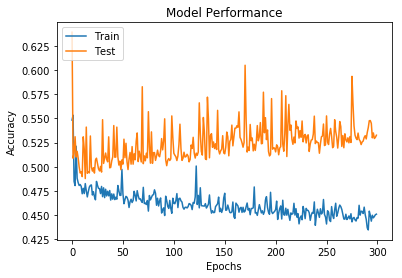

In [52]:
#Training the model 
history=model.fit(x_train,y_train,batch_size=5,epochs=300,validation_data=(x_test,y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Performance")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [35]:
yhat=model.predict(x_test)

In [36]:
yhat

array([[0.59038943],
       [0.335765  ],
       [0.1468261 ],
       [0.03915479],
       [0.3235961 ],
       [0.32194173],
       [0.4770269 ],
       [0.07844636],
       [0.15397982],
       [0.2520986 ],
       [0.50048375],
       [0.09611987],
       [0.7378913 ],
       [0.7378913 ],
       [0.04753635],
       [0.7378913 ],
       [0.21327882],
       [0.21922313],
       [0.21802956],
       [0.22191739],
       [0.43652743],
       [0.13946044],
       [0.7378913 ],
       [0.31876934],
       [0.04521312],
       [0.48978224],
       [0.2995828 ],
       [0.7378913 ],
       [0.16480313],
       [0.6283678 ],
       [0.57213664],
       [0.31752515],
       [0.05681628],
       [0.7378913 ],
       [0.09926227],
       [0.7378913 ],
       [0.05452443],
       [0.20228104],
       [0.10554148],
       [0.7378913 ],
       [0.25398684],
       [0.09968364],
       [0.02439193],
       [0.34068483],
       [0.07150504],
       [0.01750828],
       [0.7378913 ],
       [0.737

In [37]:
yhat=[yhat>0.5]

In [41]:
yhat

[array([[ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False

In [43]:
y_test.shape

(192, 1)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve

In [46]:
confusion_matrix(y_test,yhat[0])

array([[106,  17],
       [ 23,  46]])

In [66]:
accuracy_score(y_test,yhat[0])*100

79.16666666666666

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
roc_curve(y_test,yhat[0])

(array([0.        , 0.13821138, 1.        ]),
 array([0.        , 0.66666667, 1.        ]),
 array([2, 1, 0]))

In [53]:
# Checking accuracy with other algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

In [60]:
m1=LogisticRegression()
m2=DecisionTreeClassifier()
m3=AdaBoostClassifier()
m4=RandomForestClassifier()
m5=SVC()
m6=MLPClassifier()

In [61]:
m1.fit(x_train,y_train)
m2.fit(x_train,y_train)
m3.fit(x_train,y_train)
m4.fit(x_train,y_train)
m5.fit(x_train,y_train)
m6.fit(x_train,y_train)

/home/manendra/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/home/manendra/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [62]:
p1=m1.predict(x_test)
p2=m2.predict(x_test)
p3=m3.predict(x_test)
p4=m4.predict(x_test)
p5=m5.predict(x_test)
p6=m6.predict(x_test)

Logistic Regression : 78


In [65]:
print("Logistic Regression : %d"%(accuracy_score(y_test,p1)*100))
print("DTC : %d"%(accuracy_score(y_test,p2)*100))
print("AdaBoost : %d"%(accuracy_score(y_test,p3)*100))
print("Random Forest : %d"%(accuracy_score(y_test,p4)*100))
print("SVC : %d"%(accuracy_score(y_test,p5)*100))
print("MLP : %d"%(accuracy_score(y_test,p6)*100))

Logistic Regression : 78
DTC : 69
AdaBoost : 79
Random Forest : 77
SVC : 64
MLP : 70


In [92]:
dd=[78.0,69.0,79.0,77.0,64.0,70.0,79.2,68.2]
alg=["Logistic","Decision","Adaboost","Random Forest","SVC","MLP","MyModel","Naive Bayes"]

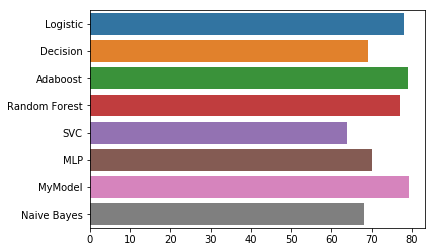

In [93]:
sns.barplot(dd,alg)